# KNN for football stats match prediction

In [1]:
import pandas as pd

df_games_stats = pd.read_csv("../data/data_extended.csv", index_col=0)

df_games_stats.head()

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,NaN,NaN,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,NaN,NaN,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,NaN,2.0,-1.0,-6.0,NaN,NaN,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,NaN,-2.0,1.0,6.0,NaN,NaN,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,NaN,0.0,0.0,-2.0,1.0,NaN,0


In [2]:
# print some info about the dataframe
print(df_games_stats.shape)
df_games_stats.info()

(1282, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282 entries, 0 to 1281
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team_ids           1282 non-null   int64  
 1   round_ids          1282 non-null   int64  
 2   shots_total        1282 non-null   int64  
 3   shots_ongoal       1236 non-null   float64
 4   shots_offgoal      1270 non-null   float64
 5   shots_insidebox    1274 non-null   float64
 6   shots_outsidebox   1256 non-null   float64
 7   passes_total       1278 non-null   float64
 8   passes_percentage  1276 non-null   float64
 9   attacks_total      1280 non-null   float64
 10  attacks_dangerous  1280 non-null   float64
 11  fouls              1236 non-null   float64
 12  corners            1268 non-null   float64
 13  possession_time    1282 non-null   int64  
 14  yellow_cards       1084 non-null   float64
 15  red_cards          102 non-null    float64
 16  saves        

In [3]:
df_games_stats.isnull().sum()

team_ids                0
round_ids               0
shots_total             0
shots_ongoal           46
shots_offgoal          12
shots_insidebox         8
shots_outsidebox       26
passes_total            4
passes_percentage       6
attacks_total           2
attacks_dangerous       2
fouls                  46
corners                14
possession_time         0
yellow_cards          198
red_cards            1180
saves                  94
substitutions          16
tackles                16
penalties            1080
injuries              780
results                 0
dtype: int64

## Cleaning data

We can see that we have none values for several columns, according to the data that we are processing we will replace the NaN values by 0 since a NaN value means none of this stat occurred during the game. Therefore no columns will be droped. 

In [4]:
df_games_stats.fillna(0, inplace=True)
df_games_stats.isnull().sum()

team_ids             0
round_ids            0
shots_total          0
shots_ongoal         0
shots_offgoal        0
shots_insidebox      0
shots_outsidebox     0
passes_total         0
passes_percentage    0
attacks_total        0
attacks_dangerous    0
fouls                0
corners              0
possession_time      0
yellow_cards         0
red_cards            0
saves                0
substitutions        0
tackles              0
penalties            0
injuries             0
results              0
dtype: int64

## Win/loss or draw

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def game_output_results():
    df = pd.DataFrame()
    df["total"] = df_games_stats.groupby("results").size()

    df.drop(index=-1, inplace=True)
    df.rename(index={0: "draw", 1: "win_or_loss"}, inplace=True)

    df.iloc[0]["total"] = df.iloc[0]["total"]/2

    df["percentage"] = round(df["total"] / (df_games_stats.shape[0]//2) * 100)

    print(f"{df}\n")
    print(f"Total games: {df_games_stats.shape[0]//2}")

    df["total"].plot(kind="bar", title="Output of games")
    plt.show()


             total  percentage
results                       
draw           154        24.0
win_or_loss    487        76.0

Total games: 641


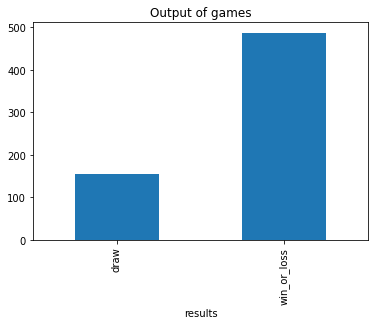

In [6]:
game_output_results()

## Model training

In [7]:
predictors = df_games_stats.columns[2:-1]
col_to_remove = {"substitutions", "injuries", "tackles", "fouls", "yellow_cards"}
predictors = list(set(predictors) - col_to_remove)

In [8]:
for col in predictors: # Loop through all columns in predictors
    if df_games_stats[col].dtype == 'object':  # check if column's type is object (text)
        df_games_stats[col] = pd.Categorical(df_games_stats[col]).codes  # convert text to numerical

df_games_stats.head()

,team_ids,round_ids,shots_total,shots_ongoal,shots_offgoal,shots_insidebox,shots_outsidebox,passes_total,passes_percentage,attacks_total,...,corners,possession_time,yellow_cards,red_cards,saves,substitutions,tackles,penalties,injuries,results
0,273,194968,-11,-2.0,-9.0,-4.0,-6.0,-202.0,-10.47,-18.0,...,-4.0,-22,1.0,1.0,2.0,3.0,-8.0,0.0,0.0,-1
1,62,194968,11,2.0,9.0,4.0,6.0,202.0,10.47,18.0,...,4.0,22,-1.0,-1.0,-2.0,-3.0,8.0,0.0,0.0,1
2,496,194968,-5,0.0,-5.0,-1.0,-5.0,-44.0,-5.46,-42.0,...,-3.0,-8,1.0,0.0,2.0,-1.0,-6.0,0.0,0.0,1
3,258,194968,5,0.0,5.0,1.0,5.0,44.0,5.46,42.0,...,3.0,8,-1.0,0.0,-2.0,1.0,6.0,0.0,0.0,-1
4,282,194968,4,-2.0,6.0,3.0,2.0,201.0,16.08,27.0,...,0.0,22,-3.0,0.0,0.0,0.0,-2.0,1.0,0.0,0


In [9]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df_games_stats["results"])
x = pd.DataFrame(data=df_games_stats[predictors])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

max_acc = 0
max_i = 1

for i in range(1, 50):
    clf_KNN = KNeighborsClassifier(n_neighbors=i)
    clf_KNN.fit(X_train, y_train.values.ravel())

    train_score = clf_KNN.score(X_train, y_train)
    test_score = clf_KNN.score(X_test, y_test)

    if test_score > max_acc:
        max_acc = test_score
        max_i = i

print(f"Max acc: {max_acc}")
print(f"n_neighbors: {max_i}")

clf_KNN = KNeighborsClassifier(n_neighbors=20)
clf_KNN.fit(X_train, y_train.values.ravel())

train_score = clf_KNN.score(X_train, y_train)
test_score = clf_KNN.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train shape (897, 14) (897, 1)
test shape (385, 14) (385, 1)
Max acc: 0.45454545454545453
n_neighbors: 20
train accuracy = 0.49498327759197325
test accuracy = 0.45454545454545453
